   # Author Name: Harvi Singh
   ### Project 02 - W200 Spring 2020, MIDS
   
   
   
   
   

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cd C:\Users\Narvi\Documents\MIDS_Berkeley\W200\Project2_Inamdar_Singh

C:\Users\Narvi\Documents\MIDS_Berkeley\W200\Project2_Inamdar_Singh


### Getting the datasets for Senator elections for last 50 years and the population data from the 2010 census 

In [3]:
senators_data = pd.read_csv("senators.csv",encoding= 'unicode_escape')
population_2010_dump = pd.read_csv("population_2010.csv",encoding= 'unicode_escape')

In [4]:
senators_data.shape

(3421, 18)

In [5]:
senators_data.describe()

,year,state_fips,state_cen,state_ic,candidatevotes,totalvotes,version
count,"3,421.00","3,421.00","3,421.00","3,421.00","3,421.00","3,421.00","3,420.00"
mean,"1,998.86",29.04,52.91,38.99,"405,230.36","2,179,958.21","20,171,859.84"
std,12.67,15.43,26.04,22.74,"772,209.82","2,114,723.76","3,936.51"
min,"1,976.00",1.00,11.00,1.00,1.00,1.00,"20,171,011.00"
25%,"1,988.00",17.00,33.00,21.00,"4,745.00","640,702.00","20,171,011.00"
50%,"2,000.00",29.00,54.00,41.00,"57,382.00","1,541,036.00","20,171,011.00"
75%,"2,010.00",41.00,74.00,56.00,"476,604.00","2,802,641.00","20,171,011.00"
max,"2,018.00",56.00,95.00,82.00,"7,864,624.00","12,578,511.00","20,190,110.00"


In [6]:
senators_data.tail()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
3416,2018,Wisconsin,WI,55,35,25,US Senate,statewide,gen,False,NaN,NaN,True,total,42,2657841,False,"20,190,110.00"
3417,2018,Wyoming,WY,56,83,68,US Senate,statewide,gen,False,John Barrasso,republican,False,total,136210,203420,False,"20,190,110.00"
3418,2018,Wyoming,WY,56,83,68,US Senate,statewide,gen,False,Gary Trauner,democrat,False,total,61227,203420,False,"20,190,110.00"
3419,2018,Wyoming,WY,56,83,68,US Senate,statewide,gen,False,Joseph Porambo,libertarian,False,total,5658,203420,False,"20,190,110.00"
3420,2018,Wyoming,WY,56,83,68,US Senate,statewide,gen,False,NaN,NaN,True,total,325,203420,False,"20,190,110.00"


### Looking for population trends by state

In [7]:
population_2010_dump.shape

(57, 151)

In [8]:
population_2010_dump.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.00,2.49,2.68,2.64,2.92,3.26,3.25,2.87,2.15,1.82
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.25,0.89,-0.04,-0.47,-0.99,-2.06,-2.49,-1.84,-2.13,-2.86
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.37,-0.96,-0.97,-0.01,-0.76,-1.39,-1.24,-0.56,-0.92,-1.11
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.26,5.13,5.85,5.29,6.16,7.28,7.15,6.20,5.23,5.20
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.61,2.72,3.06,3.16,4.03,4.99,5.26,4.02,3.04,2.31


In [9]:
population_2010_dump.describe()

,SUMLEV,STATE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
count,57.00,57.00,57.00,57.00,57.00,57.00,57.00,57.00,57.00,57.00,...,57.00,57.00,57.00,57.00,57.00,57.00,57.00,57.00,57.00,57.00
mean,38.07,27.18,"16,315,129.88","16,315,797.75","16,345,377.60","16,462,269.37","16,581,183.47","16,694,284.60","16,814,699.96","16,936,468.79",...,0.33,2.14,2.44,2.56,1.89,2.31,2.23,1.86,1.23,1.83
std,6.39,18.13,"44,360,750.28","44,362,600.08","44,445,861.28","44,776,538.31","45,114,843.64","45,435,942.46","45,780,789.52","46,132,391.06",...,5.68,4.08,4.78,5.03,5.60,6.16,6.69,7.09,7.77,5.44
min,10.00,0.00,"563,626.00","563,775.00","564,487.00","567,299.00","576,305.00","582,122.00","582,531.00","585,613.00",...,-12.93,-14.53,-14.98,-13.80,-18.26,-18.48,-19.85,-23.23,-37.86,-12.03
25%,40.00,12.00,"1,852,994.00","1,853,018.00","1,854,239.00","1,856,301.00","1,856,872.00","1,865,279.00","1,879,321.00","1,891,277.00",...,-3.13,0.24,-0.41,-0.15,-0.76,-0.93,-1.44,-1.60,-1.71,-1.05
50%,40.00,27.00,"4,625,364.00","4,625,366.00","4,635,649.00","4,671,994.00","4,717,354.00","4,764,080.00","4,823,617.00","4,852,347.00",...,-0.25,1.90,1.42,1.66,1.69,0.63,0.75,1.18,0.86,0.67
75%,40.00,41.00,"9,535,483.00","9,535,751.00","9,574,323.00","9,657,592.00","9,749,476.00","9,843,336.00","9,929,848.00","9,931,715.00",...,4.70,4.28,5.05,4.86,5.15,5.72,7.11,6.51,5.43,5.96
max,40.00,72.00,"308,745,538.00","308,758,105.00","309,321,666.00","311,556,874.00","313,830,990.00","315,993,715.00","318,301,008.00","320,635,163.00",...,15.47,16.25,16.72,22.95,14.08,16.49,18.26,15.62,15.56,15.56


In [10]:
population_2010_dump.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.00,2.49,2.68,2.64,2.92,3.26,3.25,2.87,2.15,1.82
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.25,0.89,-0.04,-0.47,-0.99,-2.06,-2.49,-1.84,-2.13,-2.86
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.37,-0.96,-0.97,-0.01,-0.76,-1.39,-1.24,-0.56,-0.92,-1.11
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.26,5.13,5.85,5.29,6.16,7.28,7.15,6.20,5.23,5.20
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.61,2.72,3.06,3.16,4.03,4.99,5.26,4.02,3.04,2.31


In [11]:
pop_data_trend = population_2010_dump.drop(['SUMLEV','REGION','DIVISION','STATE'],axis=1)
pop_data_trend = pop_data_trend.loc[:,:'POPESTIMATE2019'].iloc[5:,:]
pop_data_trend = pop_data_trend.set_index('NAME')
pop_data_trend = pop_data_trend.div(pop_data_trend.CENSUS2010POP,axis=0)
pop_years = range(2010,2020)
pop_data_trend = pop_data_trend.sort_values('POPESTIMATE2019',ascending=False)
pop_data_trend = pop_data_trend.T.drop(['ESTIMATESBASE2010','POPESTIMATE2010'],axis=0)
pop_data_trend

NAME,District of Columbia,Utah,Texas,Colorado,Florida,Nevada,Idaho,Arizona,North Dakota,Washington,...,New Jersey,Pennsylvania,Rhode Island,New York,Mississippi,Connecticut,Vermont,Illinois,West Virginia,Puerto Rico
CENSUS2010POP,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
POPESTIMATE2011,1.03,1.02,1.02,1.02,1.01,1.00,1.01,1.01,1.02,1.02,...,1.00,1.00,1.00,1.01,1.00,1.00,1.00,1.00,1.00,0.99
POPESTIMATE2012,1.06,1.03,1.04,1.03,1.03,1.02,1.02,1.03,1.04,1.03,...,1.01,1.01,1.00,1.01,1.01,1.01,1.00,1.00,1.00,0.98
POPESTIMATE2013,1.08,1.05,1.05,1.05,1.04,1.03,1.03,1.04,1.07,1.04,...,1.01,1.01,1.00,1.01,1.01,1.01,1.00,1.01,1.00,0.96
POPESTIMATE2014,1.10,1.06,1.07,1.06,1.06,1.04,1.04,1.05,1.10,1.05,...,1.01,1.01,1.00,1.01,1.01,1.01,1.00,1.00,1.00,0.95
POPESTIMATE2015,1.12,1.08,1.09,1.08,1.07,1.06,1.05,1.07,1.12,1.07,...,1.01,1.01,1.00,1.01,1.01,1.00,1.00,1.00,0.99,0.93
POPESTIMATE2016,1.14,1.10,1.11,1.10,1.10,1.08,1.07,1.09,1.12,1.08,...,1.01,1.01,1.00,1.01,1.01,1.00,1.00,1.00,0.99,0.91
POPESTIMATE2017,1.15,1.12,1.13,1.12,1.12,1.10,1.10,1.10,1.12,1.10,...,1.01,1.01,1.00,1.01,1.01,1.00,1.00,1.00,0.98,0.89
POPESTIMATE2018,1.17,1.14,1.14,1.13,1.13,1.12,1.12,1.12,1.13,1.12,...,1.01,1.01,1.01,1.01,1.00,1.00,1.00,0.99,0.97,0.86
POPESTIMATE2019,1.17,1.16,1.15,1.15,1.14,1.14,1.14,1.14,1.13,1.13,...,1.01,1.01,1.01,1.00,1.00,1.00,1.00,0.99,0.97,0.86


In [12]:
pop_data_trend.shape

(10, 52)

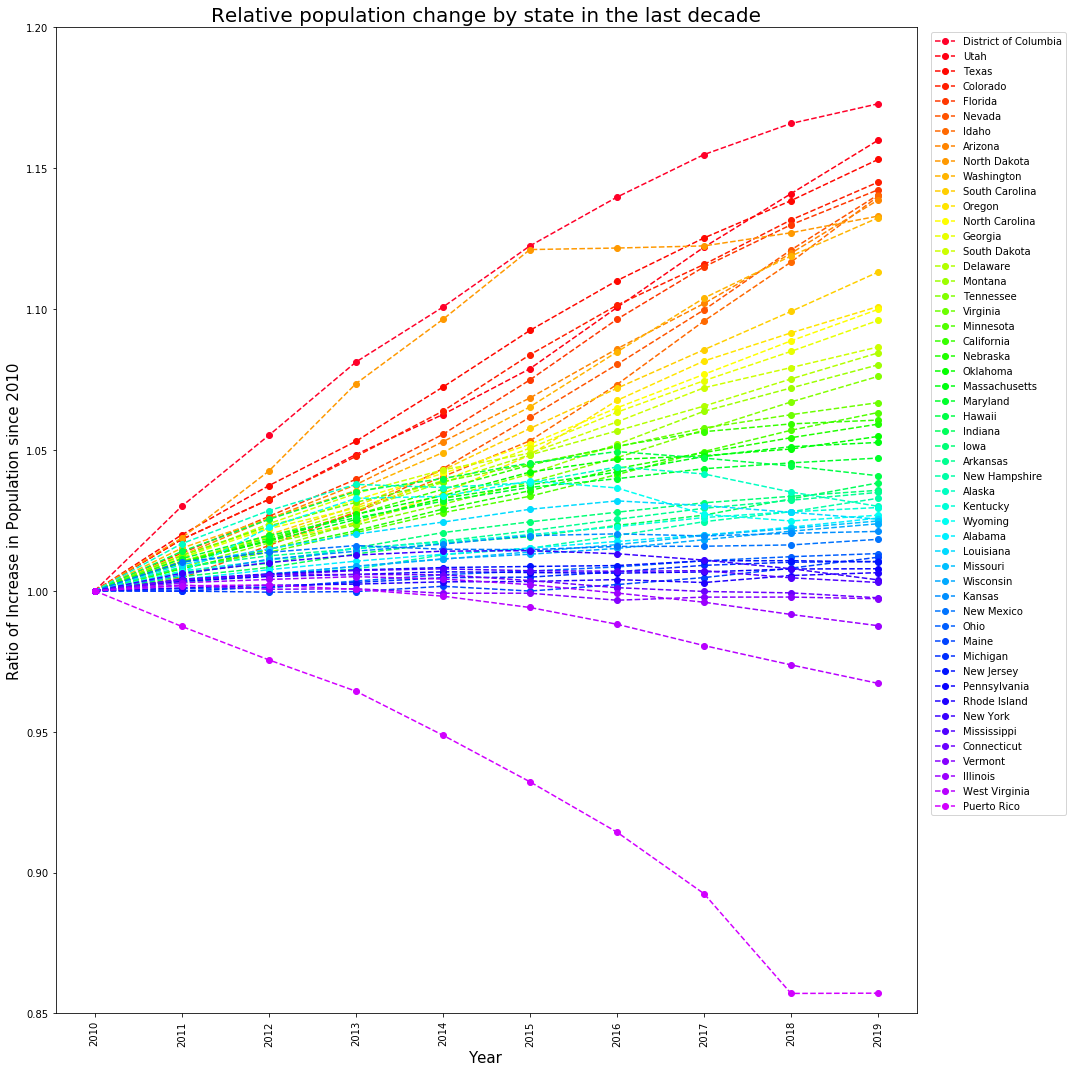

In [13]:
fig0 =  plt.figure(figsize=(15,15))
ax0 = fig0.add_subplot(1,1,1)
ax0.set_xticklabels(pop_years,rotation = 90)
ax0.set_ylabel("Ratio of Increase in Population since 2010",size=15)
ax0.set_xlabel("Year",size=15)
colormap = plt.cm.gist_rainbow
y=0.0
for i in range(0,len(pop_data_trend.columns)):
    ax0.plot(pop_data_trend.index, pop_data_trend.iloc[:,i],marker='o',linestyle='--',color=colormap(y))
    y = y+(0.9/50)
ax0.legend(bbox_to_anchor=(1.01,1))
ax0.set_ylim(0.85,1.2,0.1)
ax0.set_title("Relative population change by state in the last decade", fontsize=20)
fig0.tight_layout()
fig0.savefig("fig1.jpeg")
pass

### Cleaning the population dataset to only have the data for 2017 (which is when the vote for tax reform occured) 

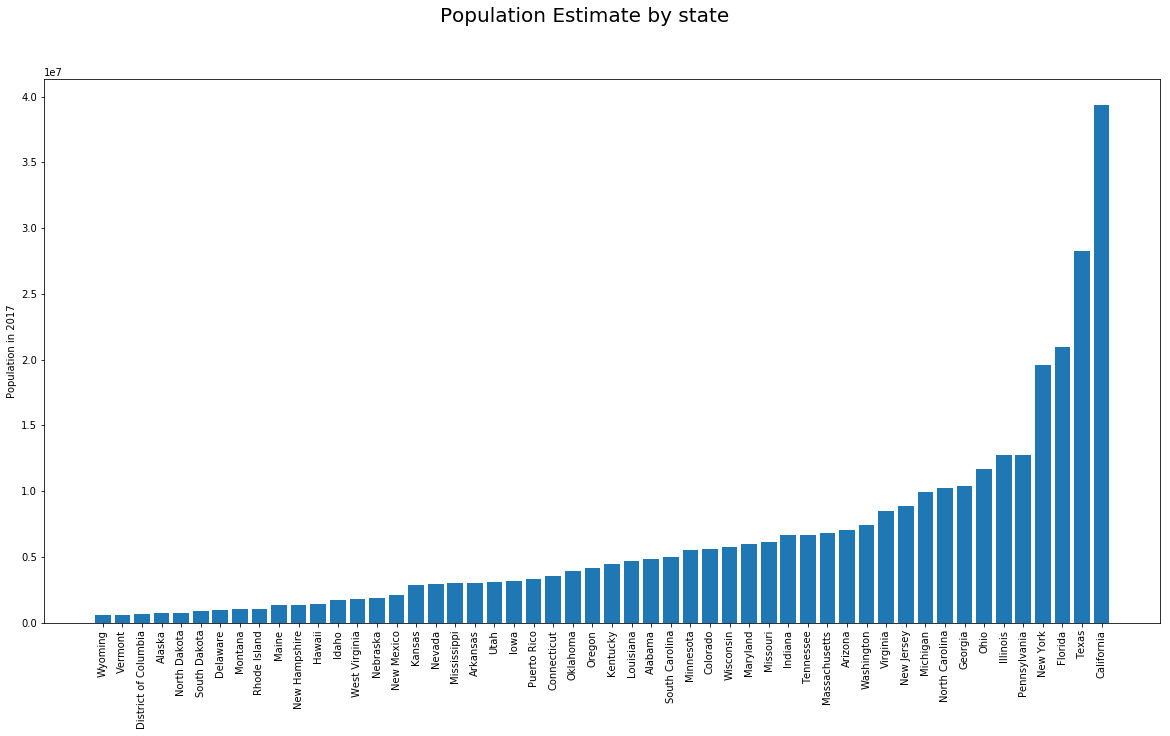

In [14]:
pop_data = population_2010_dump.loc[:,['NAME','POPESTIMATE2017']].iloc[5:,:].sort_values('POPESTIMATE2017')
pop_data = pop_data.rename(columns={'NAME':'state','POPESTIMATE2017':'population_2017'})
fig =  plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.bar(pop_data['state'], pop_data['population_2017'])
ax.set_xticklabels(pop_data['state'],rotation = 90)
ax.set_ylabel("Population in 2017")
fig.suptitle("Population Estimate by state", fontsize=20)
fig.savefig("fig2.jpeg")
pass

In [15]:
pop_data.shape

(52, 2)

### Cleaning up the senator election data and merging the population data

In [16]:
senators_new = senators_data.loc[:,['year','state','state_po','stage','special','candidate','party','candidatevotes','totalvotes']]
senators = pd.merge(senators_new, pop_data, how='left', on='state')
senators = senators.rename(columns={'candidatevotes':'candidate_votes','totalvotes':'total_votes'}).sort_values(['state','year'])
senators.tail()

,year,state,state_po,stage,special,candidate,party,candidate_votes,total_votes,population_2017
3047,2014,Wyoming,WY,gen,False,Charlie Hardy,democrat,29377,171153,578931
3417,2018,Wyoming,WY,gen,False,John Barrasso,republican,136210,203420,578931
3418,2018,Wyoming,WY,gen,False,Gary Trauner,democrat,61227,203420,578931
3419,2018,Wyoming,WY,gen,False,Joseph Porambo,libertarian,5658,203420,578931
3420,2018,Wyoming,WY,gen,False,NaN,NaN,325,203420,578931


In [17]:
senators_new.shape

(3421, 9)

In [18]:
def last_name(x):
    """This function takes the name of senators as listed in the data and returns in the lastname_initial format"""
    x_list = x.upper().split()
    return x_list[-1]+" "+x_list[0][0]
        
senators["name_identifier"] = senators['candidate'].map(lambda x:str(x))
senators["name_identifier"] = senators['name_identifier'].map(last_name)

In [19]:
senators.head()

,year,state,state_po,stage,special,candidate,party,candidate_votes,total_votes,population_2017,name_identifier
144,1978,Alabama,AL,gen,False,Jerome B. Couch,prohibition,34951,582005,4874486,COUCH J
145,1978,Alabama,AL,gen,True,James D. Martin,republican,316170,729842,4874486,MARTIN J
146,1978,Alabama,AL,gen,True,Michael R. A. Erdey,libertarian,6006,729842,4874486,ERDEY M
147,1978,Alabama,AL,gen,True,Donald Stewart,democrat,401852,729842,4874486,STEWART D
148,1978,Alabama,AL,gen,False,Howell Heflin,democrat,547054,582005,4874486,HEFLIN H


### Bringing in the voting records for the senators for the 2017 tax reform bill

In [20]:
vote_data_tax2017_raw= pd.read_csv("congress_votes_TaxCutsAndJobsAct.csv", skiprows=1)
vote_data_tax2017 = vote_data_tax2017_raw.drop(['person','district','party' ],axis =1)

In [21]:
vote_data_tax2017_raw.shape

(100, 6)

In [22]:
vote_data_tax2017_raw.head()

,person,state,district,vote,name,party
0,300002,TN,nan,Yea,Sen. Lamar Alexander [R],Republican
1,300018,WA,nan,Nay,"Sen. Maria Cantwell [D, 2001-2024]",Democrat
2,300019,DE,nan,Nay,"Sen. Thomas Carper [D, 2001-2024]",Democrat
3,300023,MS,nan,Yea,"Sen. Thad Cochran [R, 1979-2018]",Republican
4,300025,ME,nan,Yea,Sen. Susan Collins [R],Republican


### Modifying the name identifier to match the 'senators' data to help merge 

In [23]:
def last_name_vote(x):
    """This function takes the name of senators as listed in the data for voting record and returns in the lastname_initial format"""
    x_list = x.upper().split()
    y = x_list[0:-1]
    if x_list[-1] == '[R]'or x_list[-1] == '[D]':
        return y[-1]+" "+y[1][0]
    else:
        return y[-2]+" "+y[1][0]
    

In [24]:
vote_data_tax2017["name_identifier"] = vote_data_tax2017['name'].map(last_name_vote)
vote_data_tax2017 = vote_data_tax2017.rename(columns = {'year':'election_year'}).sort_values('state')
vote_data_tax2017.head()

,state,vote,name,name_identifier
17,AK,Yea,Sen. Lisa Murkowski [R],MURKOWSKI L
89,AK,Yea,Sen. Dan Sullivan [R],SULLIVAN D
23,AL,Yea,Sen. Richard Shelby [R],SHELBY R
99,AL,Yea,"Sen. Luther Strange [R, 2017-2017]",STRANGE L
28,AR,Yea,Sen. John Boozman [R],BOOZMAN J


In [25]:
vote_data_tax2017.groupby(['vote']).state.count()

vote
Nay           48
Not Voting     1
Yea           51
Name: state, dtype: int64

### Merging the voting record with the data for senator elections and population using 'name_identifiers' created

In [26]:
data_sen_vote = pd.merge(vote_data_tax2017, senators, on='name_identifier')
#Looking at data for 2010-2016 
data_sen_vote = data_sen_vote[(data_sen_vote.year>2009) & (data_sen_vote.year<2018)]

data_sen_vote.head(10)

,state_x,vote,name,name_identifier,year,state_y,state_po,stage,special,candidate,party,candidate_votes,total_votes,population_2017
1,AK,Yea,Sen. Lisa Murkowski [R],MURKOWSKI L,2010,Alaska,AK,gen,False,Lisa Murkowski,NaN,101091,255503,739700
2,AK,Yea,Sen. Lisa Murkowski [R],MURKOWSKI L,2016,Alaska,AK,gen,False,Lisa Murkowski,republican,138149,311441,739700
3,AK,Yea,Sen. Dan Sullivan [R],SULLIVAN D,2014,Alaska,AK,gen,False,Dan Sullivan,republican,135445,282400,739700
8,AL,Yea,Sen. Richard Shelby [R],SHELBY R,2010,Alabama,AL,gen,False,Richard C. Shelby,republican,968181,1485499,4874486
9,AL,Yea,Sen. Richard Shelby [R],SHELBY R,2016,Alabama,AL,gen,False,Richard C. Shelby,republican,1335104,2087444,4874486
10,AR,Yea,Sen. John Boozman [R],BOOZMAN J,2010,Arkansas,AR,gen,False,John Boozman,republican,451618,779957,3001345
11,AR,Yea,Sen. John Boozman [R],BOOZMAN J,2016,Arkansas,AR,gen,False,John Boozman,republican,661984,1107522,3001345
12,AR,Yea,Sen. Tom Cotton [R],COTTON T,2014,Arkansas,AR,gen,False,Tom Cotton,republican,478819,847505,3001345
13,AZ,Yea,"Sen. Jeff Flake [R, 2013-2018]",FLAKE J,2012,Arizona,AZ,gen,False,Jeff Flake,republican,1104457,2243422,7044008
18,AZ,Not Voting,"Sen. John McCain [R, 1987-2018]",MCCAIN J,2010,Arizona,AZ,gen,False,John McCain,republican,1005615,1708484,7044008


In [27]:
#making sure we have no outliers for the stage variable
data_sen_vote[data_sen_vote.stage!='gen']

,state_x,vote,name,name_identifier,year,state_y,state_po,stage,special,candidate,party,candidate_votes,total_votes,population_2017


### We have a 141 rows instead of 100. We have more than 2 rows for some states. Will clean data further below

In [28]:
data_sen_vote = data_sen_vote.drop(['name','stage','special'],axis=1)
data_sen_vote = data_sen_vote.rename(columns = {'state_x':'state','state_y':'state_name'})
data_sen_vote.sort_values(['candidate','state'])
data_sen_vote.head()

,state,vote,name_identifier,year,state_name,state_po,candidate,party,candidate_votes,total_votes,population_2017
1,AK,Yea,MURKOWSKI L,2010,Alaska,AK,Lisa Murkowski,NaN,101091,255503,739700
2,AK,Yea,MURKOWSKI L,2016,Alaska,AK,Lisa Murkowski,republican,138149,311441,739700
3,AK,Yea,SULLIVAN D,2014,Alaska,AK,Dan Sullivan,republican,135445,282400,739700
8,AL,Yea,SHELBY R,2010,Alabama,AL,Richard C. Shelby,republican,968181,1485499,4874486
9,AL,Yea,SHELBY R,2016,Alabama,AL,Richard C. Shelby,republican,1335104,2087444,4874486


In [29]:
pd.Series(data_sen_vote['state'].unique()).count()

50

In [30]:
data_sen_vote.shape

(141, 11)

In [31]:
data_sen_vote = data_sen_vote.reset_index()
data_sen_vote.drop('index',axis=1).sort_values('state').head()

,state,vote,name_identifier,year,state_name,state_po,candidate,party,candidate_votes,total_votes,population_2017
0,AK,Yea,MURKOWSKI L,2010,Alaska,AK,Lisa Murkowski,NaN,101091,255503,739700
1,AK,Yea,MURKOWSKI L,2016,Alaska,AK,Lisa Murkowski,republican,138149,311441,739700
2,AK,Yea,SULLIVAN D,2014,Alaska,AK,Dan Sullivan,republican,135445,282400,739700
3,AL,Yea,SHELBY R,2010,Alabama,AL,Richard C. Shelby,republican,968181,1485499,4874486
4,AL,Yea,SHELBY R,2016,Alabama,AL,Richard C. Shelby,republican,1335104,2087444,4874486


In [32]:
def delete_duplicates(df):
    delete_list = []
    for i in range(0,len(list(df.index))-1):
        if df['name_identifier'][i] == df['name_identifier'][i+1] and df['state'][i] == df['state'][i+1]:
            delete_list.append(i)
    new_df = df.drop(delete_list).drop(['index'],axis=1).reset_index()
    return new_df.drop('index',axis=1)

In [33]:
d1 = delete_duplicates(data_sen_vote)
d1.sort_values('state').head()

,state,vote,name_identifier,year,state_name,state_po,candidate,party,candidate_votes,total_votes,population_2017
0,AK,Yea,MURKOWSKI L,2016,Alaska,AK,Lisa Murkowski,republican,138149,311441,739700
1,AK,Yea,SULLIVAN D,2014,Alaska,AK,Dan Sullivan,republican,135445,282400,739700
2,AL,Yea,SHELBY R,2016,Alabama,AL,Richard C. Shelby,republican,1335104,2087444,4874486
3,AR,Yea,BOOZMAN J,2016,Arkansas,AR,John Boozman,republican,661984,1107522,3001345
4,AR,Yea,COTTON T,2014,Arkansas,AR,Tom Cotton,republican,478819,847505,3001345


In [34]:
d1.shape

(99, 11)

In [35]:
new_row = pd.DataFrame(d1.iloc[2,:]).T
d2 = pd.concat([d1,new_row],ignore_index=True).sort_values('state').reset_index().drop('index',axis=1)

In [36]:
#manually adding items that were missing on the senator election file.
d2.iloc[2,2] =  'STRANGE L'
d2.iloc[2,5] =  'Luther Strange'

In [37]:
def mean(x):
    return sum(x)/2

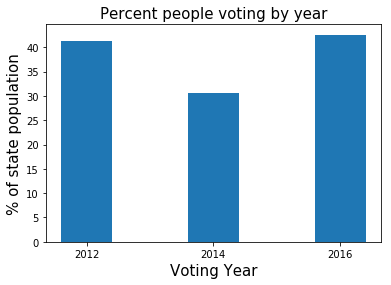

In [38]:
d3 = d2.loc[:,['candidate', 'state','state_name', 'vote', 'party', 'candidate_votes', 'total_votes', 'year', 'population_2017']]
d3['percentage_of_people_voted'] = 100*d3.total_votes/d3.population_2017
d4 = pd.DataFrame(d3.groupby('year').percentage_of_people_voted.agg('sum')/d3.groupby('year').percentage_of_people_voted.agg('count'))
plt.bar(d4.index,d4.percentage_of_people_voted)
plt.title("Percent people voting by year",size=15)
plt.xticks([2012,2014,2016])
plt.xlabel("Voting Year",size=15)
plt.ylabel("% of state population",size=15)
fig0.tight_layout()
plt.savefig("fig3.jpeg")
#Clearly, a higher percentage of people vote during presidential election years
pass

In [39]:
d3.head()

,candidate,state,state_name,vote,party,candidate_votes,total_votes,year,population_2017,percentage_of_people_voted
0,Lisa Murkowski,AK,Alaska,Yea,republican,138149,311441,2016,739700,42.10
1,Dan Sullivan,AK,Alaska,Yea,republican,135445,282400,2014,739700,38.18
2,Richard C. Shelby,AL,Alabama,Yea,republican,1335104,2087444,2016,4874486,42.82
3,Richard C. Shelby,AL,Alabama,Yea,republican,1335104,2087444,2016,4874486,42.82
4,John Boozman,AR,Arkansas,Yea,republican,661984,1107522,2016,3001345,36.90


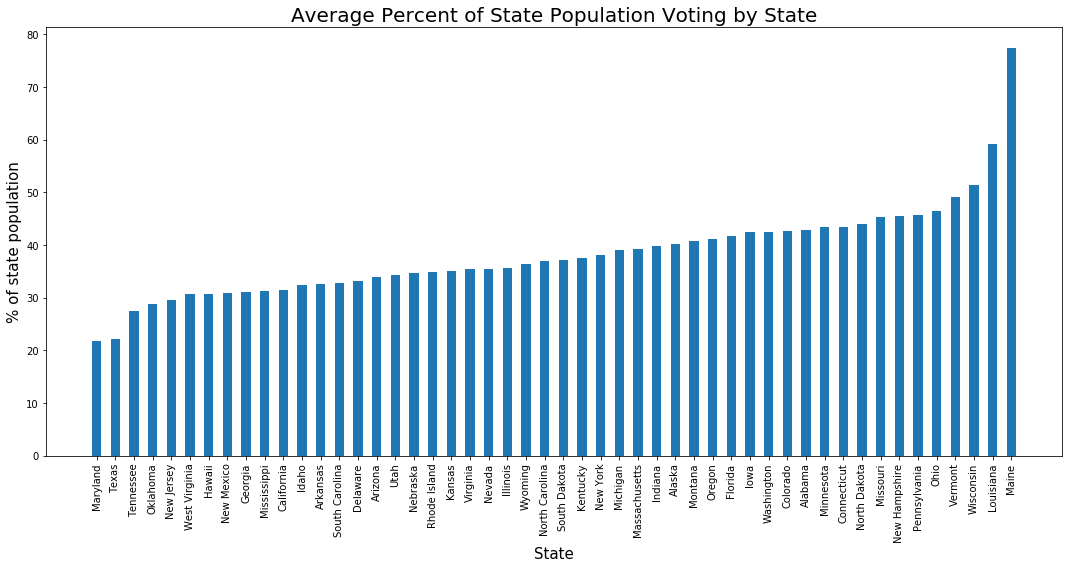

In [40]:
d5 = pd.DataFrame(d3.groupby('state_name').percentage_of_people_voted.agg(mean)).sort_values('percentage_of_people_voted')
fig2 =  plt.figure(figsize=(15,8))
ax2 = fig2.add_subplot(1,1,1)
ax2.bar(d5.index,d5.percentage_of_people_voted,width=.5)
ax2.set_title("Average Percent of State Population Voting by State",size=20)
ax2.set_xlabel("State",size=15)
plt.ylabel("% of state population",size=15)
plt.xticks(rotation=90)
fig2.tight_layout()
fig2.savefig("fig4.jpeg")
pass

### Evaluating the relative strenth of state in terms of influence per capita

We wanted to plot both the population and senate numbers on one graph. They are of course ways apart senators are just 100 while population of US is 330M. So to bring the numbers in the same range - below 100, teh data is normalized as follows:-

- State Population Influence = *1/half_of_state_population) * 1000000
- For example Maine has population of ~1.3 M and its influence score is 14.8
- While for California with population of ~39M the influence score is only 0.5

In [41]:
d4 = d3.groupby('state')['candidate_votes','total_votes','population_2017'].agg(mean).sort_values('population_2017')
d4['state_population_influence'] = 2*10**13/d4['population_2017']
d4.tail()

,candidate_votes,total_votes,population_2017,state_population_influence
state,,,,
PA,"2,986,533.00","5,839,639.00","12,787,641.00","1,564,010.13"
NY,"2,285,349.00","7,458,676.50","19,589,572.00","1,020,951.35"
FL,"4,679,321.00","8,745,883.00","20,963,613.00","954,034.02"
TX,"3,650,834.00","6,256,590.00","28,295,273.00","706,831.84"
CA,"7,703,688.50","12,411,340.50","39,358,497.00","508,149.49"


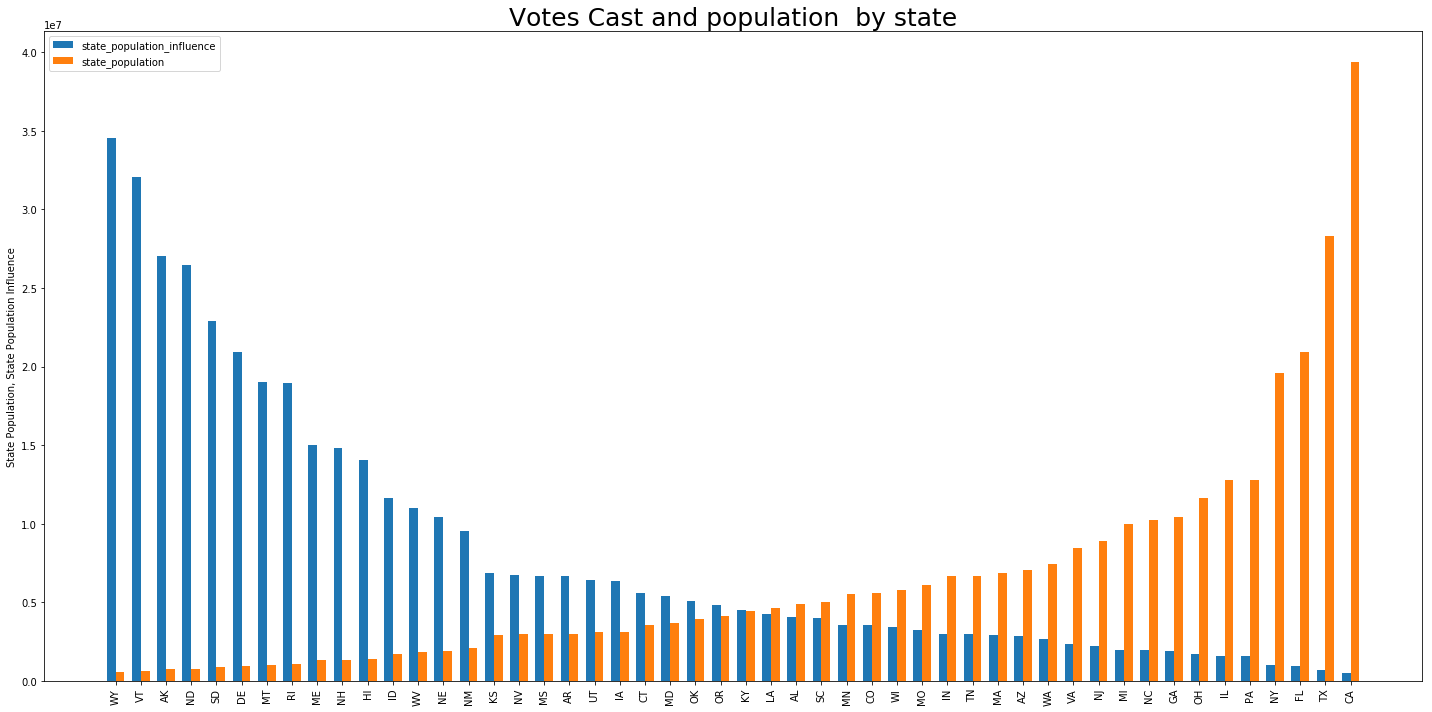

In [53]:
fig1 =  plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(1,1,1)
x = np.arange(len(d4.index))
width = 0.35
labels = d4.index
bar1 = ax1.bar(x - width/2, d4['state_population_influence'], width, label='state_population_influence')
bar2 = ax1.bar(x + width/2, d4['population_2017'], width, label='state_population')

ax1.set_ylabel('State Population, State Population Influence')
ax1.set_title('Votes Cast and population  by state',size=25)
ax1.set_xticks(x)
ax1.set_xticklabels(labels,rotation=90)
ax1.legend()
fig1.tight_layout()
fig1.savefig("fig5.jpeg")
pass

### Finally evaluating the numbers that actually represent the votes of the senator

In [43]:
d3.head()

,candidate,state,state_name,vote,party,candidate_votes,total_votes,year,population_2017,percentage_of_people_voted
0,Lisa Murkowski,AK,Alaska,Yea,republican,138149,311441,2016,739700,42.10
1,Dan Sullivan,AK,Alaska,Yea,republican,135445,282400,2014,739700,38.18
2,Richard C. Shelby,AL,Alabama,Yea,republican,1335104,2087444,2016,4874486,42.82
3,Richard C. Shelby,AL,Alabama,Yea,republican,1335104,2087444,2016,4874486,42.82
4,John Boozman,AR,Arkansas,Yea,republican,661984,1107522,2016,3001345,36.90


In [44]:
g1 = d3.groupby(['vote','state'])
d6 = g1['candidate_votes'].agg(max).unstack().T.fillna(0)
d6.head()

vote,Nay,Not Voting,Yea
state,,,
AK,0.00,0.00,"138,149.00"
AL,0.00,0.00,"1,335,104.00"
AR,0.00,0.00,"661,984.00"
AZ,0.00,"1,359,267.00","1,104,457.00"
CA,"7,864,624.00",0.00,0.00


In [45]:
g2 = d3.groupby(['state'])
d7 = g2[['population_2017']].agg(max)
d7.head()

,population_2017
state,
AK,739700
AL,4874486
AR,3001345
AZ,7044008
CA,39358497


In [57]:
d8 = pd.merge(d6,d7,on='state')
d8['not_heard'] = d8['population_2017']-d8['Yea']-d8['Nay']-d8['Not Voting']
d8 = d8.sort_values('population_2017',ascending=False)
d9 = pd.DataFrame(d8.apply(sum))

In [58]:
d8.head(20)

,Nay,Not Voting,Yea,population_2017,not_heard
state,,,,,
CA,"7,864,624.00",0.00,0.00,39358497,"31,493,873.00"
TX,0.00,0.00,"4,440,137.00",28295273,"23,855,136.00"
FL,"4,523,451.00",0.00,"4,835,191.00",20963613,"11,604,971.00"
NY,"4,420,043.00",0.00,0.00,19589572,"15,169,529.00"
PA,"3,021,364.00",0.00,"2,951,702.00",12787641,"6,814,575.00"
IL,"3,012,940.00",0.00,0.00,12778828,"9,765,888.00"
OH,"2,762,690.00",0.00,"3,118,567.00",11659650,"5,778,393.00"
GA,0.00,0.00,"2,135,806.00",10410330,"8,274,524.00"
NC,0.00,0.00,"2,395,376.00",10268233,"7,872,857.00"


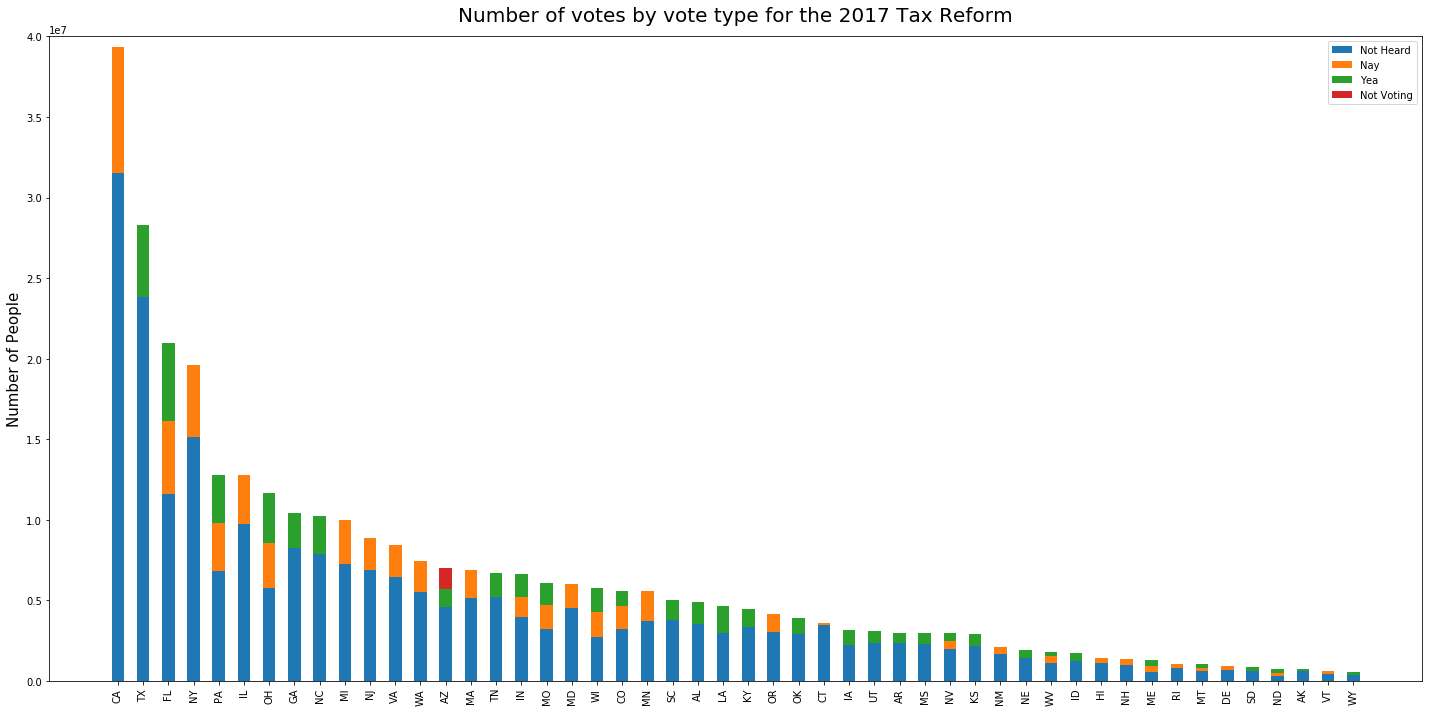

In [54]:
fig3 =  plt.figure(figsize=(20,10))
ax3 = fig3.add_subplot(1,1,1)
x = np.arange(len(d8.index))
width = 0.5
labels = d8.index
bar1 = ax3.bar(x, d8['not_heard'], width, label='Not Heard')
bar2 = ax3.bar(x, d8['Nay'], width, label='Nay',bottom=d8['not_heard'])
bar3 = ax3.bar(x, d8['Yea'], width, label='Yea',bottom=d8['Nay']+d8['not_heard'])
bar4 = ax3.bar(x, d8['Not Voting'], width, label='Not Voting',bottom=d8['Yea']+d8['Nay']+d8['not_heard'])


ax3.set_ylabel('Number of People',size=15)
ax3.set_title('Number of votes by vote type for the 2017 Tax Reform',size=20,pad=15)
ax3.set_xticks(x)
ax3.set_xticklabels(labels,rotation=90)
ax3.legend()
ax3.set_ylim(0,40000000,1000000)
fig3.tight_layout()
fig3.savefig("fig6.jpeg")
pass

In [49]:
d10 = pd.DataFrame(d8.apply(sum))
d10.columns=["Total"]
d10 = d10.sort_values('Total')

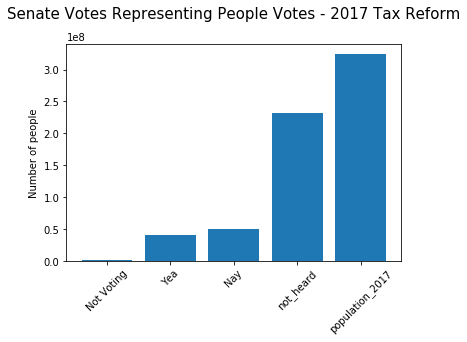

In [50]:
plt.bar(d10.index,d10.Total)
plt.title("Senate Votes Representing People Votes - 2017 Tax Reform",pad=25,size=15)
plt.xticks(d10.index,rotation=45)
plt.xlabel("")
plt.ylabel("Number of people")
#Clearly, a higher percentage of people vote during presidential election years
pass